![alternatvie text](https://www.doc.zuv.fau.de//M/FAU-Logo/01_FAU_Kernmarke/Web/FAU_Kernmarke_Q_RGB_blue.svg)

# Perception in Robotics

Summer Semester 2024, Friedrich-Alexander-Universität Erlangen-Nürnberg

# 2. Exercise - Image Filtering

In this exercise, we will cover image filtering using the [OpenCV](https://docs.opencv.org/4.x/d0/de3/tutorial_py_intro.html) and [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html) python libraries. As example images we will use samples from the [Kodak](https://r0k.us/graphics/kodak/) dataset.

The goal of this exercise is the become familiar with different types of noise and filtering.

The solutions for the assignment may be a Python Notebook or .py files. The visual results can be integrated into the notebook or a PDF document.

In [56]:
# Import libaries which we will use in this exercise.
import cv2
import numpy as np
import matplotlib.pyplot as plt

## A. Image Noise

To study the impact of different types of noise, load the image (`kodim21.png`) and convert it to grayscale by using **OpenCV**. 

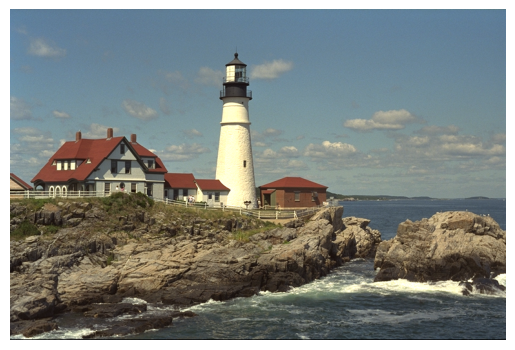

In [57]:
image_path = "/Users/aruneshsubramanians/Documents/Machine Learning/PIR/kodim21.png"
image = cv2.imread(image_path)

# Convert BGR format of OpenCV to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

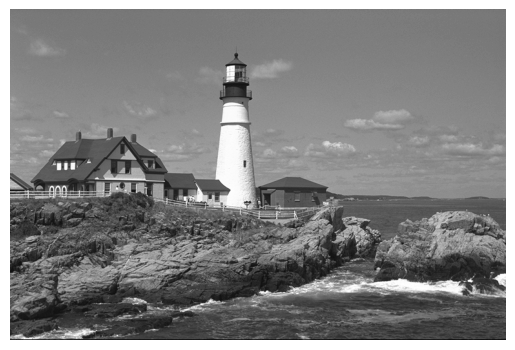

In [58]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_image, cmap = 'gray')
plt.axis('off')
plt.show()

### Salt and Pepper Noise
Random occurrence of black and white pixels in an image is called [salt and pepper noise](https://en.wikipedia.org/wiki/Salt-and-pepper_noise).

Implement a function that adds salt and pepper noise to a given grayscale image by using numpy and plot the resulting image.

Note: Use a number of white and black pixels each between 300 and 10000.

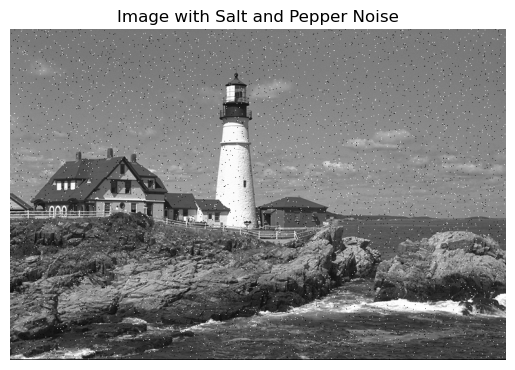

In [59]:
def add_salt_pepper_noise(img):

    salt_pepper_amount = 5000
    noisy_img = img.copy()

    # For grayscale image
    if len(img.shape) == 2:
        rows, cols = img.shape
    
        # Add salt noise (white pixels)
        num_salt = np.random.randint(300, salt_pepper_amount)
        coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
        noisy_img[coords[0], coords[1]] = 255
    
        # Add pepper noise (black pixels)
        num_pepper = np.random.randint(300, salt_pepper_amount)
        coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
        noisy_img[coords[0], coords[1]] = 0

    # For RGB image
    elif len(img.shape) == 3:
        rows, cols, channels = img.shape

        # Add salt noise (white pixels)
        num_salt = np.random.randint(300, salt_pepper_amount)
        for i in range(num_salt):
            x, y = np.random.randint(0, rows), np.random.randint(0, cols)
            noisy_img[x, y] = [255, 255, 255]

        # Add pepper noise (black pixels)
        num_pepper = np.random.randint(300, salt_pepper_amount)
        for i in range(num_pepper):
            x, y = np.random.randint(0, rows), np.random.randint(0, cols)
            noisy_img[x, y] = [0, 0, 0]
    
    return noisy_img

salt_pepper_noise = add_salt_pepper_noise(gray_image)

plt.imshow(salt_pepper_noise, cmap = 'gray')
plt.title('Image with Salt and Pepper Noise')
plt.axis('off')

plt.show()

### Gaussian Noise
Intensity variation based on a probability density function equal to
the normal distribution. Commonly used to model sensor noise.

Implement a function that adds gaussian noise to a given grayscale image by using numpy and plot the resulting image.

Note: Convert image and noise to the same data type and account for values larger than the range of pixel values e.g., 255 after adding noise. Use a standard deviation of 0.05 for the gaussian noise.

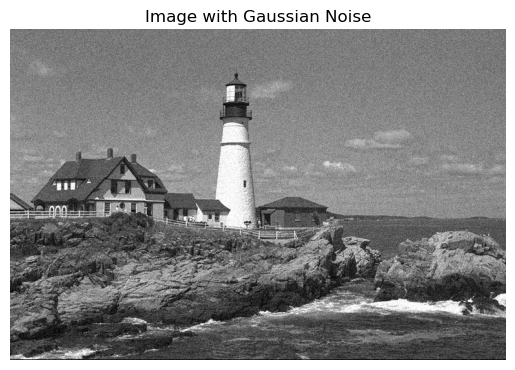

In [60]:
def add_gaussian_noise(img):

    mean = 0
    standard_deviation = 0.05

    # Normalize the image to range [0, 1]
    normalized_img = img / 255.0
    
    # Generate Gaussian noise
    noise = np.random.normal(mean, standard_deviation, img.shape)
    
    # Add the noise to the image
    noisy_img = normalized_img + noise
    
    # Clip the values to be in the range [0, 1]
    noisy_img = np.clip(noisy_img, 0, 1)
    
    # Convert the image back to range [0, 255] and to uint8
    noisy_img = (noisy_img * 255).astype(np.uint8)
    
    return noisy_img

gaussian_noise = add_gaussian_noise(gray_image)

plt.imshow(gaussian_noise, cmap = 'gray')
plt.title('Image with Gaussian Noise')
plt.axis('off')

plt.show()

## B. Convolution
Implement the convolution algorithm in numpy, with stride 1. Your implementation shall be able to handle kernels with size 3x3 and 5x5, and should not make use of any library calls to perform the actual convolution.

Note: To obtain an output with the same size as the input zero padding is required.

In [61]:
def convolve2d(image, kernel):
    """
    Apply a convolution kernel to a 2D image array.

    Parameters:
    image (np.array): 2D array of the image to be convolved.
    kernel (np.array): 2D array of the kernel to be used for convolution.

    Returns:
    out (np.array): 2D array of the convolved image.
    """
    
    # Get the dimensions of the image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate the amount of padding needed
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Pad the image with zeros
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode = 'constant', constant_values = 0)
    
    # Initialize the output array
    output_array = np.zeros_like(image)
    
    # Perform the convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            
            # Element-wise multiplication and sum the result
            output_array[i, j] = np.sum(region * kernel)
    
    return output_array


Apply your implemented convolution with the following filters, plot the output and explain which effect each kernel has on the input image.

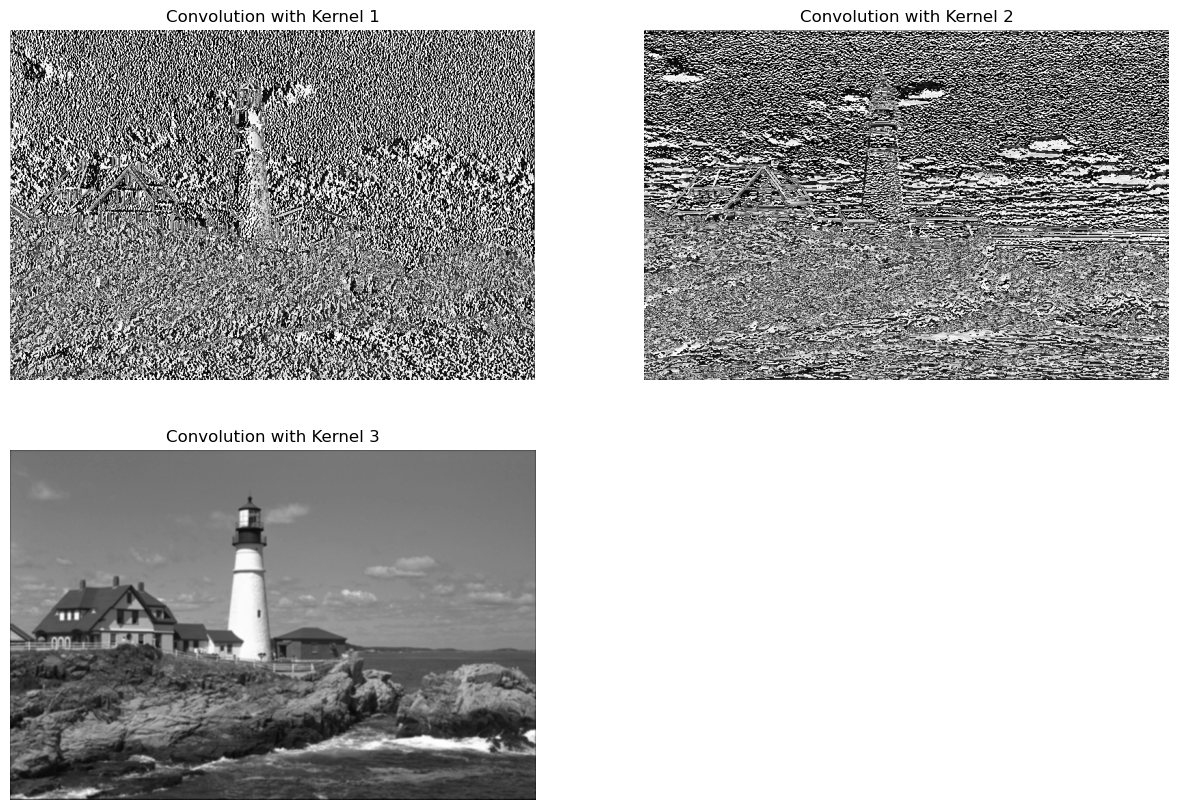

In [62]:
kernel1 = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])
    
kernel2 = np.array([[-1, -1, -1],
                  [0, 0, 0],
                  [1, 1, 1]])

kernel3 =  1/256 * np.array([[1, 4, 6, 4, 1],
                    [4, 16, 24, 16, 4],
                    [6, 24, 36, 24, 6],
                    [4, 16, 24, 16, 4],
                    [1, 4, 6, 4, 1]])

convolved_image1 = convolve2d(gray_image, kernel1)
convolved_image2 = convolve2d(gray_image, kernel2)
convolved_image3 = convolve2d(gray_image, kernel3)
        
# Plot the original and convolved images
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(convolved_image1, cmap='gray')
plt.title('Convolution with Kernel 1')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(convolved_image2, cmap='gray')
plt.title('Convolution with Kernel 2')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(convolved_image3, cmap='gray')
plt.title('Convolution with Kernel 3')
plt.axis('off')

plt.show()


# Effects of each kernel

Kernel 1 Effect: An edge detection filter. It detects vertical edges in the image by calculating the gradient in the x-direction.

Kernel 2 Effect: Also an edge detection filter, but it detects horizontal edges by calculating the gradient in the y-direction.

Kernel 3 Effect: A Gaussian blur filter. It smooths the image by averaging the pixel values with a Gaussian weight, reducing noise and detail.

## C. Filtering
Here, we introduce the [image filtering function](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html) of **OpenCV** and investigate their denoising performance on an image corrupted by salt and pepper noise.

First, use the function `add_salt_pepper_noise` from task A and apply salt and pepper noise to `kodim21.png`.

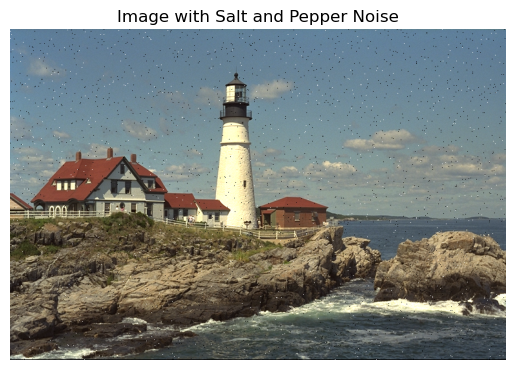

In [63]:
salt_pepper_noise = add_salt_pepper_noise(image_rgb)

plt.imshow(salt_pepper_noise, cmap = 'gray')
plt.title('Image with Salt and Pepper Noise')
plt.axis('off')

plt.show()

Then, apply the **OpenCV** filters for averaging, gaussian blur, median and bilateral filtering.

In [64]:
# Apply averaging filter
average_blur = cv2.blur(salt_pepper_noise, (5, 5))

# Apply Gaussian blur
gaussian_blur = cv2.GaussianBlur(salt_pepper_noise, (5, 5), 0)

# Apply median filter
median_blur = cv2.medianBlur(salt_pepper_noise, 5)

# Apply bilateral filter
bilateral_filter = cv2.bilateralFilter(salt_pepper_noise, 9, 75, 75)


Plot the filter outputs and the initial noisy image side by side. Explain the performance of each filter and give an argument for why the best performing filter works so well in this scenario.

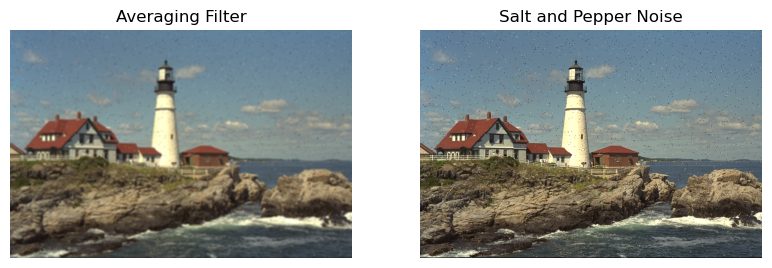

In [65]:
# Plotting the results of the averaging filter
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(average_blur, cmap='gray')
plt.title('Averaging Filter')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(salt_pepper_noise, cmap='gray')
plt.title('Salt and Pepper Noise')
plt.axis('off')

plt.show()

Averaging Filter:

The averaging filter blurs the image by averaging the pixel values in the neighborhood of each pixel.
It reduces the effect of salt and pepper noise to some extent, but it may result in loss of image details and blurring artifacts, especially in regions with sharp edges or high contrast.

As we can notice in the image, the details, especially the edges like corners of the lighthouse, are lost.

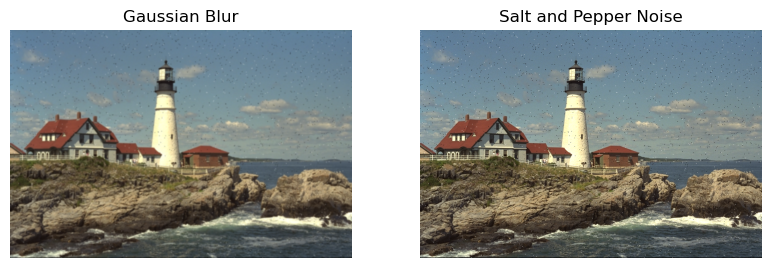

In [66]:
# Plotting the results of the Gaussian blur
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(gaussian_blur, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(salt_pepper_noise, cmap='gray')
plt.title('Salt and Pepper Noise')
plt.axis('off')

plt.show()

Gaussian Blur:

Gaussian blur applies a Gaussian kernel to the image, which weights nearby pixels according to their distance from the center.
It is similar to the averaging filter but gives more weight to the central pixels, resulting in smoother transitions and better preservation of edges.

Gaussian blur performs better than the averaging filter in reducing noise while preserving image details, which we can observe from the output image above.

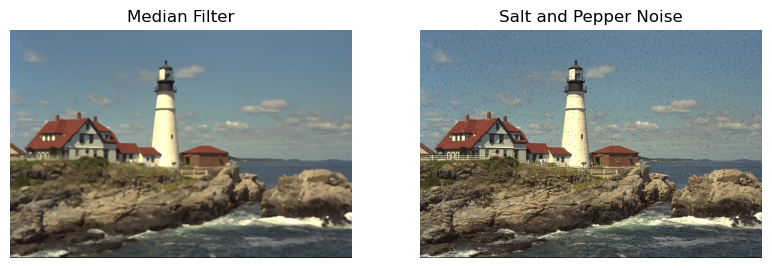

In [67]:
# Plotting the results of the median filter
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(median_blur, cmap='gray')
plt.title('Median Filter')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(salt_pepper_noise, cmap='gray')
plt.title('Salt and Pepper Noise')
plt.axis('off')

plt.show()

Median Filter:

The median filter replaces each pixel's value with the median value of the intensities in its neighborhood.
It is particularly effective for removing salt and pepper noise because it replaces noisy pixels with the median value of nearby pixels, which is less affected by outliers.

Median filtering is robust to noise and preserves edges well, making it suitable for images with impulse noise like salt and pepper noise. It can be noticed that the Median filter restores the noised image almost to the original image.

In our case, it has the best performance, because the median filter replaces noisy pixels with more representative values from their neighborhoods, making it highly effective for denoising images affected by impulse noise like salt and pepper noise.


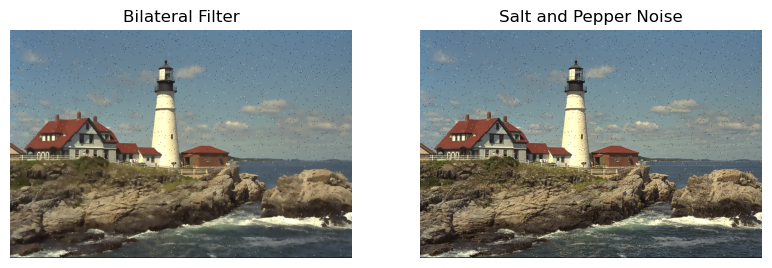

In [68]:
# Plotting the results of the bilateral filter
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(bilateral_filter, cmap='gray')
plt.title('Bilateral Filter')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(salt_pepper_noise, cmap='gray')
plt.title('Salt and Pepper Noise')
plt.axis('off')

plt.show()

Bilateral Filter:

The bilateral filter is a nonlinear filter that smooths images while preserving edges.
It considers both spatial distance and intensity differences when smoothing pixels, which helps preserve edges while reducing noise.

The bilateral filter performs well in denoising tasks where preserving edges is crucial, making it effective for images with salt and pepper noise. Though not the best, the Bilateral filter performs better than the Averaging and Gaussian filter in our case, by retaining sharper details like the edges.